In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Read in excel files

In [2]:
df_2019 = pd.read_excel('data/2019 SALES.xlsx')

In [3]:
df_2018 = pd.read_excel('data/2018 SALES.xlsx')

## Check Tables

In [4]:
df_2018.head()

,Item ID,Description,Customer ID,Customer Name,Type,Date,Quantity,Unit Price,Invoice No.
0,SHRTWT,SHORT WEIGHT,GAF001,"TL Foods, Inc.",Invoice,2018-01-02,-2000.0,0.45,10576
1,C10017,Chicken Jumbo Leg #40,GAF001,"TL Foods, Inc.",Invoice,2018-01-02,40000.0,0.45,10576
2,C10021,Chicken Leg Meat Fresh #40,JOY001,"Joy Fresh Marketing World, Inc.",Invoice,2018-01-02,1600.0,1.01,231265
3,C10007,Chicken Breast Meat Fresh #40,JOY001,"Joy Fresh Marketing World, Inc.",Invoice,2018-01-02,80.0,1.09,231265
4,C10021,Chicken Leg Meat Fresh #40,CIN001,Cindy,Invoice,2018-01-02,1200.0,1.00,231266


In [5]:
df_2019.head()

,Item ID,Description,Customer ID,Customer Name,Type,Date,Quantity,Unit Price,Invoice No.
0,C10021,Chicken Leg Meat Fresh #40,JOY001,"Joy Fresh Marketing World, Inc.",Invoice,2019-01-02,960.0,1.09,24913
1,C10021,Chicken Leg Meat Fresh #40,YOS003,Yosamite Valley Beef Distributors,Invoice,2019-01-02,800.0,1.09,24914
2,C10036,Chicken Thigh Meat Fresh #40,YOS003,Yosamite Valley Beef Distributors,Invoice,2019-01-02,120.0,1.19,24914
3,C10021,Chicken Leg Meat Fresh #40,EXP001,Express Provisions Maet & Produce,Invoice,2019-01-02,440.0,1.09,24915
4,C10036,Chicken Thigh Meat Fresh #40,PVO001,"Pivo Management, Inc.",Invoice,2019-01-02,120.0,1.19,24916


## Check shape

In [6]:
df_2018.shape

(33771, 9)

In [7]:
df_2019.shape

(21909, 9)

## Merge Tables

In [8]:
df = pd.concat([df_2018,df_2019])

In [9]:
df.shape

(55680, 9)

In [10]:
df.head()

,Item ID,Description,Customer ID,Customer Name,Type,Date,Quantity,Unit Price,Invoice No.
0,SHRTWT,SHORT WEIGHT,GAF001,"TL Foods, Inc.",Invoice,2018-01-02,-2000.0,0.45,10576
1,C10017,Chicken Jumbo Leg #40,GAF001,"TL Foods, Inc.",Invoice,2018-01-02,40000.0,0.45,10576
2,C10021,Chicken Leg Meat Fresh #40,JOY001,"Joy Fresh Marketing World, Inc.",Invoice,2018-01-02,1600.0,1.01,231265
3,C10007,Chicken Breast Meat Fresh #40,JOY001,"Joy Fresh Marketing World, Inc.",Invoice,2018-01-02,80.0,1.09,231265
4,C10021,Chicken Leg Meat Fresh #40,CIN001,Cindy,Invoice,2018-01-02,1200.0,1.00,231266


## New Column for Invoice Total

In [11]:
df['Invoice Total'] = df['Quantity'] * df['Unit Price']

In [12]:
df['Invoice Total'].sum()

38392110.0883916

## Which is the most popular item ordered?

In [13]:
df.Description.value_counts()

Chicken Leg Meat Fresh #40        12002
Chicken Breast Meat Fresh #40      4584
Beef Bone #50                      3116
Chicken  Breast Bone #40           2802
Chicken Thigh Meat Fresh #40       2743
Chicken Jumbo Leg #40              2743
Pork Chop (End Cut) #30            1645
Chicken Leg Meat-Skin On #40       1610
Beef Drop Flank PALO               1602
Beef Eye Round                     1274
Pork  Bone                         1100
Beef Leg Tendon #11                1056
Beef Tenderloin                     938
Beef Brisket IBP                    830
Pork Neck Bones                     758
Pork Butts - Boneless (IBP)         717
Pork Bellies                        613
Beef Tripe #22                      581
Pork Spare Ribs                     509
Chicken Mid Joint Wing #44.09       501
Beef New York Strip                 486
Pork Fat                            475
Orange Chicken (Colonel)            452
Chicken Leg Bone #40                440
Beef Short Rib (Sliced) #10 -A      425


## Which Customer has highest order count?

In [14]:
df['Customer Name'].value_counts()

Capital Seafoods Group                     5417
Pho Pasteur                                3622
S & I Trading Co.                          2548
Pho Legend, Inc.                           2206
WILL CALL                                  1922
Bolsa Meat                                 1783
Quan Nem Ninh Hoa                          1576
JPT Trading Co., Inc.                      1455
T&A                                        1439
LG Food                                    1430
AVO Trading, Inc.                          1297
C & H Company                              1291
Taiwah Trading Corp.                       1202
Yosamite Valley Beef Distributors          1145
Global Foods 121                           1036
Peter's Supplies/H&S                        980
CPG FOODS, LLC                              958
Brilliant Trading Corp.                     898
J.R. Republic, Inc.                         890
Viet Huong                                  877
Delta Food Compay                       

## Why are there negative quantities?

In [15]:
df.Quantity.describe()

count    55680.000000
mean       621.276481
std       2211.093821
min     -37240.000000
25%         65.977500
50%        180.000000
75%        560.000000
max      40000.000000
Name: Quantity, dtype: float64

## Remove Outliers

In [16]:
df = df[df['Quantity']>0]

In [17]:
df.Quantity.describe()

count    54974.000000
mean       638.595551
std       2212.113239
min          1.000000
25%         68.022500
50%        193.750000
75%        560.000000
max      40000.000000
Name: Quantity, dtype: float64

## Volume and Aggregate Sales 
+ Description
+ Customer

In [18]:
grouped = df.groupby('Description').sum().sort_values('Invoice Total',ascending=False)

In [19]:
print('Top Products by Gross Sales')
grouped.head()

Top Products by Gross Sales


,Quantity,Unit Price,Invoice Total
Description,,,
Chicken Leg Meat Fresh #40,12669724.00,11039.946498,1.155731e+07
Chicken Jumbo Leg #40,6848754.70,1461.969381,3.162567e+06
Chicken Breast Meat Fresh #40,2119259.00,5148.231125,2.267647e+06
Beef Flap Meat (S),329013.77,376.130000,1.568929e+06
Chicken Thigh Meat Fresh #40,1117445.00,3203.205000,1.300815e+06


In [20]:
grouped['Invoice Total'].sum()

38739340.46455163

In [21]:
df[df['Description']=='Beef Tendon Ball']['Invoice Total'].sum()

24373.36

### By Customer

In [22]:
customer_grouped = df.groupby('Customer Name').sum().sort_values('Invoice Total',ascending=False)

In [23]:
print('Top 10 Customers by Gross Sales')
customer_grouped.head(10)

Top 10 Customers by Gross Sales


,Quantity,Unit Price,Invoice Total
Customer Name,,,
"JW Foodservice, Inc.",2644267.220,2090.440000,6.949741e+06
"TL Foods, Inc.",5856800.000,71.570000,2.643550e+06
"CPG FOODS, LLC",1519234.900,1631.879989,1.429926e+06
Peter's Supplies/H&S,1418400.600,1314.108000,1.323036e+06
D & B Foods,1323082.040,530.070000,1.203932e+06
Minh's Meat Co.,1076804.800,277.340000,1.072107e+06
Capital Seafoods Group,568541.658,10414.843782,1.022759e+06
"J.R. Republic, Inc.",1021315.190,1138.210000,1.018132e+06
Bolsa Meat,967705.180,2262.820192,9.718994e+05


In [24]:
df

,Item ID,Description,Customer ID,Customer Name,Type,Date,Quantity,Unit Price,Invoice No.,Invoice Total
1,C10017,Chicken Jumbo Leg #40,GAF001,"TL Foods, Inc.",Invoice,2018-01-02,40000.00,0.45,10576,18000.0000
2,C10021,Chicken Leg Meat Fresh #40,JOY001,"Joy Fresh Marketing World, Inc.",Invoice,2018-01-02,1600.00,1.01,231265,1616.0000
3,C10007,Chicken Breast Meat Fresh #40,JOY001,"Joy Fresh Marketing World, Inc.",Invoice,2018-01-02,80.00,1.09,231265,87.2000
4,C10021,Chicken Leg Meat Fresh #40,CIN001,Cindy,Invoice,2018-01-02,1200.00,1.00,231266,1200.0000
5,B10006,Beef Chuck Roll,CIN001,Cindy,Invoice,2018-01-02,274.97,2.49,231266,684.6753
6,C10007,Chicken Breast Meat Fresh #40,C&H002,C & H Company,Invoice,2018-01-02,800.00,1.09,231267,872.0000
7,C10036,Chicken Thigh Meat Fresh #40,C&H002,C & H Company,Invoice,2018-01-02,200.00,1.19,231267,238.0000
8,C10021,Chicken Leg Meat Fresh #40,C&H002,C & H Company,Invoice,2018-01-02,1400.00,1.01,231267,1414.0000
9,B10015,Beef Leg Tendon #11,LGF001,LG Food,Invoice,2018-01-02,30.00,4.05,231268,121.5000
10,C10026,Chicken Leg Meat-Skin On #40,LGF001,LG Food,Invoice,2018-01-02,280.00,0.92,231268,257.6000


In [25]:
df.shape

(54974, 10)

In [26]:
df.to_csv('data/tnt_clean.csv')

Text(0.5, 1.0, 'Top 10 Customers')

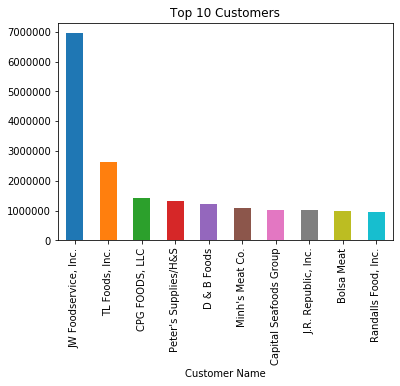

In [32]:
customer_grouped['Invoice Total'].head(10).plot.bar()
plt.title('Top 10 Customers')